In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import pandas as pd
import numpy as np

In [12]:
data=pd.read_csv("E:\Python\PracticleData\data1.txt", names=["population","profit"])

In [38]:
#data.plot(kind='scatter',x='population',y='profit',figsize=(12,8))

In [14]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [15]:
#defining the method of Linear Regression
def computeCost(X,y,theta):
    inner=np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [16]:
data.insert(0,'ones',1) ##0->column no.,  ones->new clmn name,   1->clmn value

In [17]:
data

,ones,population,profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [18]:
##puttting value in X and y
X=data.iloc[:,0:2]
y=data.iloc[:,2:3]

In [19]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [20]:
## converting dataframes into matrix
X=np.matrix(X)
y=np.matrix(y)
theta=np.matrix(np.zeros((1,2))) 
#theta=np.matrix(np.ones((1,2))) as per requirement from In[111] line 3 

In [21]:
np.shape(X),np.shape(y),np.shape(theta),theta

((97, 2), (97, 1), (1, 2), matrix([[0., 0.]]))

In [22]:
#calling computeCost(-,-,-) function
c=computeCost(X,y,theta)

In [23]:
#sum of the errors when theta=0,0 
c   

32.072733877455676

In [24]:
def gradientDescent(X,y,theta,alpha, iterations):
    temp = np.matrix(np.zeros((1,2)))
    parameters = 2  #theta1,theta0
    cost = np.zeros(iterations) #error of every iteration
    for i in range(iterations):
        error = (X*theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j]) 
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
        theta = temp
        cost[i] = computeCost(X,y,theta) 
    return theta,cost

In [25]:
#a,b=gradientDescent(X,y,theta,0.1,10)
#changing the values of alpha to checking the cost (must be decreases)
a,b=gradientDescent(X,y,theta,0.01,10000)
#now change the theta values from zeroes to smthing but 
#it will not change a'(as we got minimum of a at alpha=0.01 and iter=10000 ) 

In [26]:
a,"\t",b     #theta0=-3.89578082,    theta1=1.19303364

(matrix([[-3.89578082,  1.19303364]]),
 '\t',
 array([6.73719046, 5.93159357, 5.90115471, ..., 4.47697138, 4.47697138,
        4.47697138]))

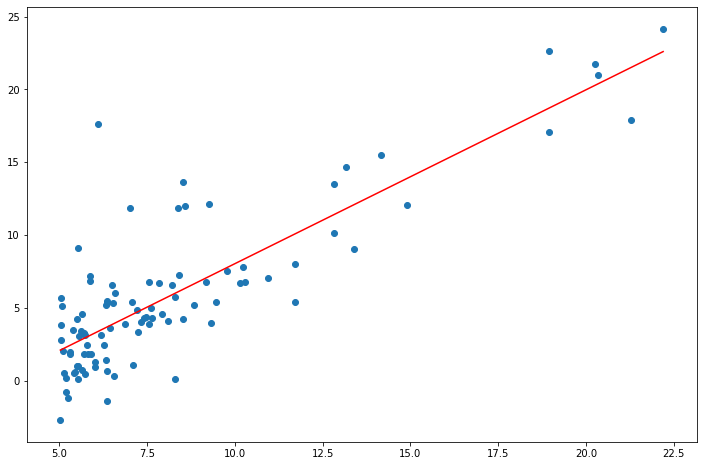

In [42]:
x= np.linspace(data.population.min(), data.population.max(), 100) #data between min and max of population in 100 equal parts
f = a[0,0] + a[0,1] *x                                            #hypothetical formula
fig,ax = plt.subplots(figsize=(12,8))                             # empty sub plot create
ax.plot(x,f,'r')                                                  #plot graph
ax.scatter(data.population, data.profit)                          #scattering original values#